# Лабораторная работа № 1.

---------------------

**Выполнил**: Маковеев Никита Владимирович

In [113]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
# import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline
# plt.style.use('seaborn')

## Определение параметра **random_state**

In [114]:
random_state = 97 # можно изменить на 42, как в задании. Мне кажется слишком банальным.

### Анализ требований

Задание: сделать исследование и обучение ML-модели регрессии для предсказания страховых медицинских расходов.

**Знакомство с данными**

In [115]:
#читаем выданные данные
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:
+ age — возраст страхователя;
+ sex — пол;
+ bmi — индекс массы тела (), в идеале — от 18.5 до 24.9;
+ children — количество детей, охваченных медицинской страховкой;
+ smoker — является ли человек курящим;
+ region — район проживания в США (северо­восток, юго­восток, северо­запад, юго­запад);
+ charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.



In [116]:
target_feature = 'charges'


In [117]:
df.shape

(1338, 7)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Как видно пустых строчек нет.

## <center> Итерация №1
На первой итерации мы должны прийти к выводу - решаема ли задача. Может ли модель получить базовое качество (baseline). Для этого мы проводим небольшое исследование данных, базовую предобработку и строим простую модель, без подбора параметров.

### Исследование данных

Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

Выводим описательные статистики для числовых и категориальных признаков

In [119]:
temp_data = df
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Подготовка данных

Цель этого этапа — подготовить обучающую выборку для использования в моделировании.

Линейная регрессия, которую мы будем использовать, является моделью, которая требует численного представления данных. То есть на этапе подготовки данных мы должны позаботиться о кодировании текстовых категориальных признаков. 

К тому же, если в ваших данных присутствуют пропуски данных, то необходимо обратать и их, так как пропуски в данных вызовут ошибку при подаче данных в модель.

Произведем One Hot-кодирование категориальных признаков с помощью функции pandas - get_dummies(). 

In [120]:
#Производим кодирование категориальных признаков
temp_data['sex'] = temp_data['sex'].apply(lambda x: 0 if x == 'no' else 1)
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

categorial_data = pd.get_dummies(temp_data, dtype=int)
categorial_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Разделим набор данных на матрицу наблюдений X (таблица из объектов и их признаков) и столбец правильных ответов y

In [121]:
#X - матрица наблюдений, y - столбец правильных ответов
X = categorial_data.drop(target_feature, axis=1)
y = categorial_data[target_feature]

### Задание 1. 
Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании
выборки для тестирования модели.


In [122]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=random_state #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


Чему равно количество наблюдений в тестовом наборе данных?

-----

Ответ: в тестовой выборке 268 строк.

### 2. Задание.
Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

In [123]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict): # функция для красивой печати результатов
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [124]:
#Инициализируем объект класса линейная регрессия
lr_model = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr_model.fit(X_train, y_train)


LinearRegression()

In [125]:

#Делаем предсказание для каждой из выборок
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.760
Train MAE: 4117
Train MAPE: 41%


Test R^2: 0.711
Test MAE: 4288
Train MAPE: 42%


Чему равны значения метрик на тренировочной и тестовой выборках?

--------

```
Train R^2: 0.125
Train MAE: 9037
Train MAPE: 113%


Test R^2: 0.110
Test MAE: 8886
Train MAPE: 119%
```

### Задание 3. 
Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и
предсказанием: `𝑦 − ̂𝑦` (без модуля).

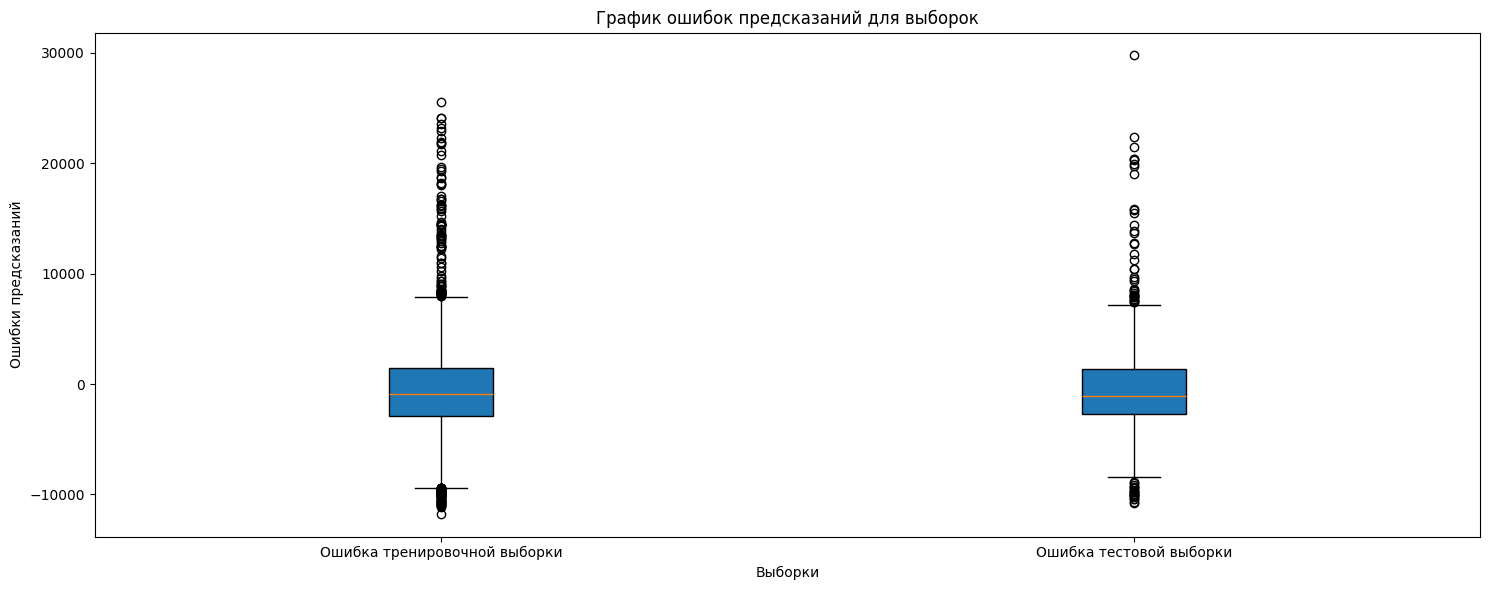

In [126]:
train_diff_error = y_train - y_train_pred
test_diff_error = y_test - y_test_pred
labels = ['Ошибка тренировочной выборки', 'Ошибка тестовой выборки']
fig, ax = plt.subplots(figsize=(15, 6))
train_boxplot = ax.boxplot([train_diff_error, test_diff_error], labels= labels,patch_artist=True)


ax.set_xlabel("Выборки")
ax.set_ylabel("Ошибки предсказаний")
ax.set_title("График ошибок предсказаний для выборок")

plt.tight_layout()
plt.show()

Как видно, усы у тренировочной немного больше, поэтому разброс значений больше.

Выберите верные ответы: 
+ A) Разброс ошибок на тестовой выборке больше, чем на тренировочной. 
+ B) Разброс ошибок на тренировочной выборке больше, чем на тестовой. 
+ C) Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0). 
+ D) Медианная ошибка на тренировочной и тестовой выборках положительная (больше 0)

-------

**Ответ:** В,С


### Задание 4.
Нормализуйте тренировочную и тестовую выборки с помощью min­max­нормализации
(MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.
Примечание. Min­max­нормализация не искажает изначальный вид бинарных категориальных
признаков, в отличие от стандартизации.
На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь
классом `PolynomialFeatures` из библиотеки `sklearn`. Значение параметра `include_bias` выставите
на False.


In [127]:
from sklearn.preprocessing import MinMaxScaler

#Создаем объект для min-max нормализации
scaler = MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [128]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

X_test_poly.shape, X_train_poly.shape



((268, 54), (1070, 54))

**Чему равно результирующее количество столбцов?**

----

**Ответ: 54**

### Задание 5.
Обучите модель линейной регрессии на полиномиальных признаках.

In [129]:
lr2_model = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr2_model.fit(X_train_poly, y_train)


LinearRegression()

In [130]:
#Делаем предсказание для каждой из выборок
y_train_pred = lr2_model.predict(X_train_poly)
y_test_pred = lr2_model.predict(X_test_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.856
Train MAE: 2763
Train MAPE: 27%


Test R^2: 0.806
Test MAE: 3001
Train MAPE: 27%


**Чему равно значение метрики $𝑅^2$ на тестовой выборке?**

-------

**Ответ:** 0.806


### Задание 6.
Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

In [131]:
lr2_model.coef_

array([ 3.68275253e+03, -1.81898940e-12,  3.41315878e+03,  3.45808443e+03,
        1.31574299e+03,  4.41610095e+01, -2.55400855e+02,  2.40014201e+02,
       -2.87743552e+01,  7.48288511e+03, -9.09494702e-13,  2.18711517e+03,
       -1.75707423e+02,  3.99650713e+02, -1.98462390e+02,  6.86218696e+02,
        1.43884670e+03,  1.75614952e+03,  9.09494702e-13, -1.81898940e-12,
       -2.72848411e-12, -1.81898940e-12,  7.27595761e-12, -9.09494702e-13,
        3.63797881e-12,  3.63797881e-12, -5.82374267e+03,  6.30258653e+02,
        5.38209177e+04,  3.67861200e+03,  2.02283855e+03, -1.54651559e+03,
       -7.41776178e+02, -1.60845960e+03, -2.15892145e+03,  1.02399056e+03,
        1.79866691e+03,  9.85159078e+02, -3.49732119e+02,  1.31574299e+03,
        8.81981809e+02, -1.62614132e+02, -6.66188458e+02,  1.26256377e+03,
        4.41610095e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.55400855e+02,  0.00000000e+00,  0.00000000e+00,  2.40014201e+02,
        0.00000000e+00, -

Какой вывод можно сделать? ­ 
+ Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация. ­ 
+ Значения коэффициентов приемлемые, модель устойчива, регуляризация не нужна.

-------

На мой взгляд, коэфициенты соотносятся с порядком целевого признака, тк в среднем порядок коэффициентов это $10^3$, а цены у нас как раз в тысячах долларов. Соответственно, регуляризация тут не требуется.

### Задание 7.
Постройте линейную регрессию с L1­регуляризацией (Lasso) на полиномиальных признаках. В
качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в
значение 2000.

In [132]:
from sklearn.linear_model import  Lasso 

lasso_model = Lasso(max_iter=2000)

lasso_model.fit(X_train_poly, y_train)

Lasso(max_iter=2000)

In [133]:
y_train_lasso_predictions = lasso_model.predict(X_train_poly)
y_test_lasso_predictions = lasso_model.predict(X_test_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_lasso_predictions, y_test, y_test_lasso_predictions)

Train R^2: 0.856
Train MAE: 2763
Train MAPE: 27%


Test R^2: 0.805
Test MAE: 3005
Train MAPE: 27%
